In [ ]:
import pandas as pd
import numpy as np
from sklearn. ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

DATATEST LOADING

In [ ]:
Data =pd.read_csv('/content/college_student_placement_dataset.csv')
df=Data

In [ ]:
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


DATA PREPARATION

In [ ]:
#Shape:
df.shape

(10000, 10)

In [ ]:
#Missing value:
df.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [ ]:
#duplicate value:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Statistical Summary:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


DATA SPLIT

In [ ]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
df["Placement"]=df["Placement"].map({"Yes":1,"No":0})
df["Internship_Experience"] =df["Internship_Experience"].map({"Yes":1,"No":0})
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,0,1,8,0,1
9996,CLG0098,70,9.25,9.34,7,0,0,7,2,0
9997,CLG0066,89,6.08,6.25,3,1,3,9,5,0
9998,CLG0045,107,8.77,8.92,3,0,7,5,1,0


In [ ]:
df.dtypes

,0
College_ID,object
IQ,int64
Prev_Sem_Result,float64
CGPA,float64
Academic_Performance,int64
Internship_Experience,int64
Extra_Curricular_Score,int64
Communication_Skills,int64
Projects_Completed,int64
Placement,int64


In [ ]:
x=df.drop(["College_ID","Placement"],axis=1)
y=df["Placement"]
x

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,0,8,8,4
1,97,5.52,5.37,8,0,7,8,0
2,109,5.36,5.83,9,0,3,1,1
3,122,5.47,5.75,6,1,1,6,1
4,96,7.91,7.69,7,0,8,10,2
...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,0,1,8,0
9996,70,9.25,9.34,7,0,0,7,2
9997,89,6.08,6.25,3,1,3,9,5
9998,107,8.77,8.92,3,0,7,5,1


In [ ]:
y

,Placement
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,0
9997,0
9998,0


In [ ]:

print(x.shape)
print(y.shape)

(10000, 8)
(10000,)


In [ ]:
df["Placement"].value_counts()

,count
Placement,
0,8341
1,1659


In [ ]:
df["target"]="Placement"
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,target
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0,Placement
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0,Placement
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0,Placement
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0,Placement
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0,Placement
...,...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,0,1,8,0,1,Placement
9996,CLG0098,70,9.25,9.34,7,0,0,7,2,0,Placement
9997,CLG0066,89,6.08,6.25,3,1,3,9,5,0,Placement
9998,CLG0045,107,8.77,8.92,3,0,7,5,1,0,Placement


TRAIN TEST SPLIT

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
Student =RandomForestClassifier(n_estimators=100,random_state=42)
Student.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = Student.predict(x_test)

In [ ]:
Acc =accuracy_score(y_test,y_pred)

print("Placement Accuracy :",Acc)

Placement Accuracy : 1.0


In [ ]:
CM =confusion_matrix(y_test,y_pred)
print("Student confusion Matrix :",CM)

Student confusion Matrix : [[1669    0]
 [   0  331]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

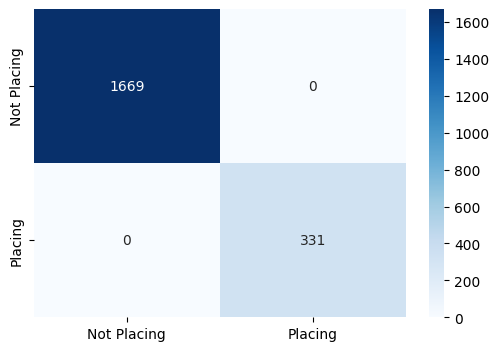

In [ ]:
labels=["Not Placing","Placing"]

plt. figure(figsize=(6,4))

sns.heatmap(CM,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues")

In [ ]:
cr =classification_report(y_test,y_pred)

print("Placement CLASSIFICATION REPORT :",cr)

Placement CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1669
           1       1.00      1.00      1.00       331

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

